## Task 1: Importing Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image 
from matplotlib import pyplot as plt

print('Using Tensorflow', tf.__version__)

Using Tensorflow 1.14.0


## Task 2:Rotation

In [7]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

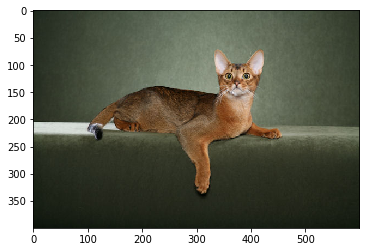

In [17]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


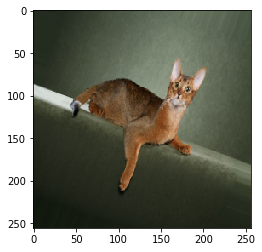

In [18]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 3:Width and Hieght Shifts

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


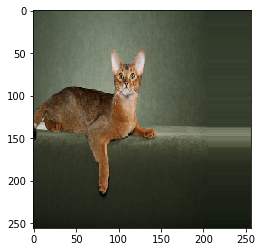

In [22]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 4:Brightness

Found 1 images belonging to 1 classes.


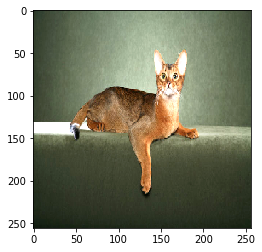

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2.0)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 5:Shear Transformation

Found 1 images belonging to 1 classes.


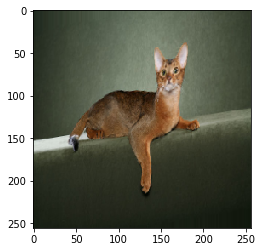

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 6:Zoom

Found 1 images belonging to 1 classes.


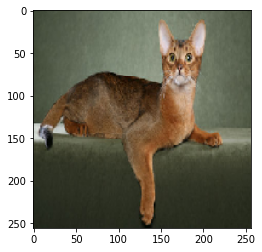

In [39]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = [0.5, 1.5]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 7:Channel Shift

Found 1 images belonging to 1 classes.


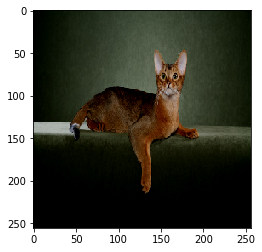

In [40]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [41]:
x.mean()

30.467178

In [42]:
np.array(Image.open(image_path)).mean()

69.57810416666666

## Task 8:Flips

Found 1 images belonging to 1 classes.


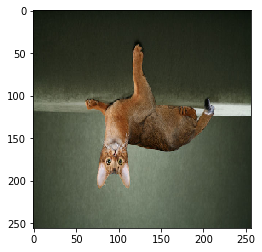

In [44]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Task 9:Normalisation

### Featurewise

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#example
#x_mean = x_train.mean()
#x_std = x_train.std()
#x_train_norm = (x_tain - x_mean) / x_std

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [7]:
x, y = next(generator.flow(x_train, y_train, batch_size = 1))

print(x.mean(), x.std(),y)
print(x_train.mean())

-0.16674195 1.0448248 [[5]]
120.70756512369792


### Samplewise

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator()

x, y = next(generator.flow(x_train, y_train, batch_size = 1))
print(x.mean(), x.std(),y)

107.23666 40.6866 [[2]]


## Task 10:Rescale and Processing Function

In [53]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
)

In [54]:
x, y = next(generator.flow(x_train, y_train, batch_size = 1))

In [55]:
print(x.mean(), x.std(),y)

-0.23582006 0.48713538 [[1]]


## Task 11:Using in model training

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape = (32, 32, 3),
        pooling = 'avg'
    ),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [11]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs=5, steps_per_epoch=15
)

Epoch 1/5
15/15 [==============================] - 6s 399ms/step - loss: 2.5672 - acc: 0.2833
Epoch 2/5
15/15 [==============================] - 6s 392ms/step - loss: 2.3203 - acc: 0.2854
Epoch 3/5
15/15 [==============================] - 6s 391ms/step - loss: 2.1091 - acc: 0.2792
Epoch 4/5
15/15 [==============================] - 6s 393ms/step - loss: 2.0537 - acc: 0.2958
Epoch 5/5
15/15 [==============================] - 6s 392ms/step - loss: 1.9013 - acc: 0.3646
